<a href="https://colab.research.google.com/github/mihirmaurya31/EDADiabetes_data/blob/main/Diabetes_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.api import OLS

# Set plot styles
sns.set(style='whitegrid')


In [2]:
# Load the dataset
url = "https://web.stanford.edu/~hastie/Papers/LARS/diabetes.data"
data = pd.read_csv(url, delim_whitespace=True)

# Display the first few rows of the dataset
print(data.head())

# Check for missing values
print(data.isnull().sum())


   AGE  SEX   BMI     BP   S1     S2    S3   S4      S5  S6    Y
0   59    2  32.1  101.0  157   93.2  38.0  4.0  4.8598  87  151
1   48    1  21.6   87.0  183  103.2  70.0  3.0  3.8918  69   75
2   72    2  30.5   93.0  156   93.6  41.0  4.0  4.6728  85  141
3   24    1  25.3   84.0  198  131.4  40.0  5.0  4.8903  89  206
4   50    1  23.0  101.0  192  125.4  52.0  4.0  4.2905  80  135
AGE    0
SEX    0
BMI    0
BP     0
S1     0
S2     0
S3     0
S4     0
S5     0
S6     0
Y      0
dtype: int64


In [3]:
# Check the data types of the columns
print(data.dtypes)

# Separate continuous, discrete, and categorical variables
continuous_vars = data.select_dtypes(include=['float64', 'int64']).columns
print("Continuous Variables:", continuous_vars)


AGE      int64
SEX      int64
BMI    float64
BP     float64
S1       int64
S2     float64
S3     float64
S4     float64
S5     float64
S6       int64
Y        int64
dtype: object
Continuous Variables: Index(['AGE', 'SEX', 'BMI', 'BP', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'Y'], dtype='object')


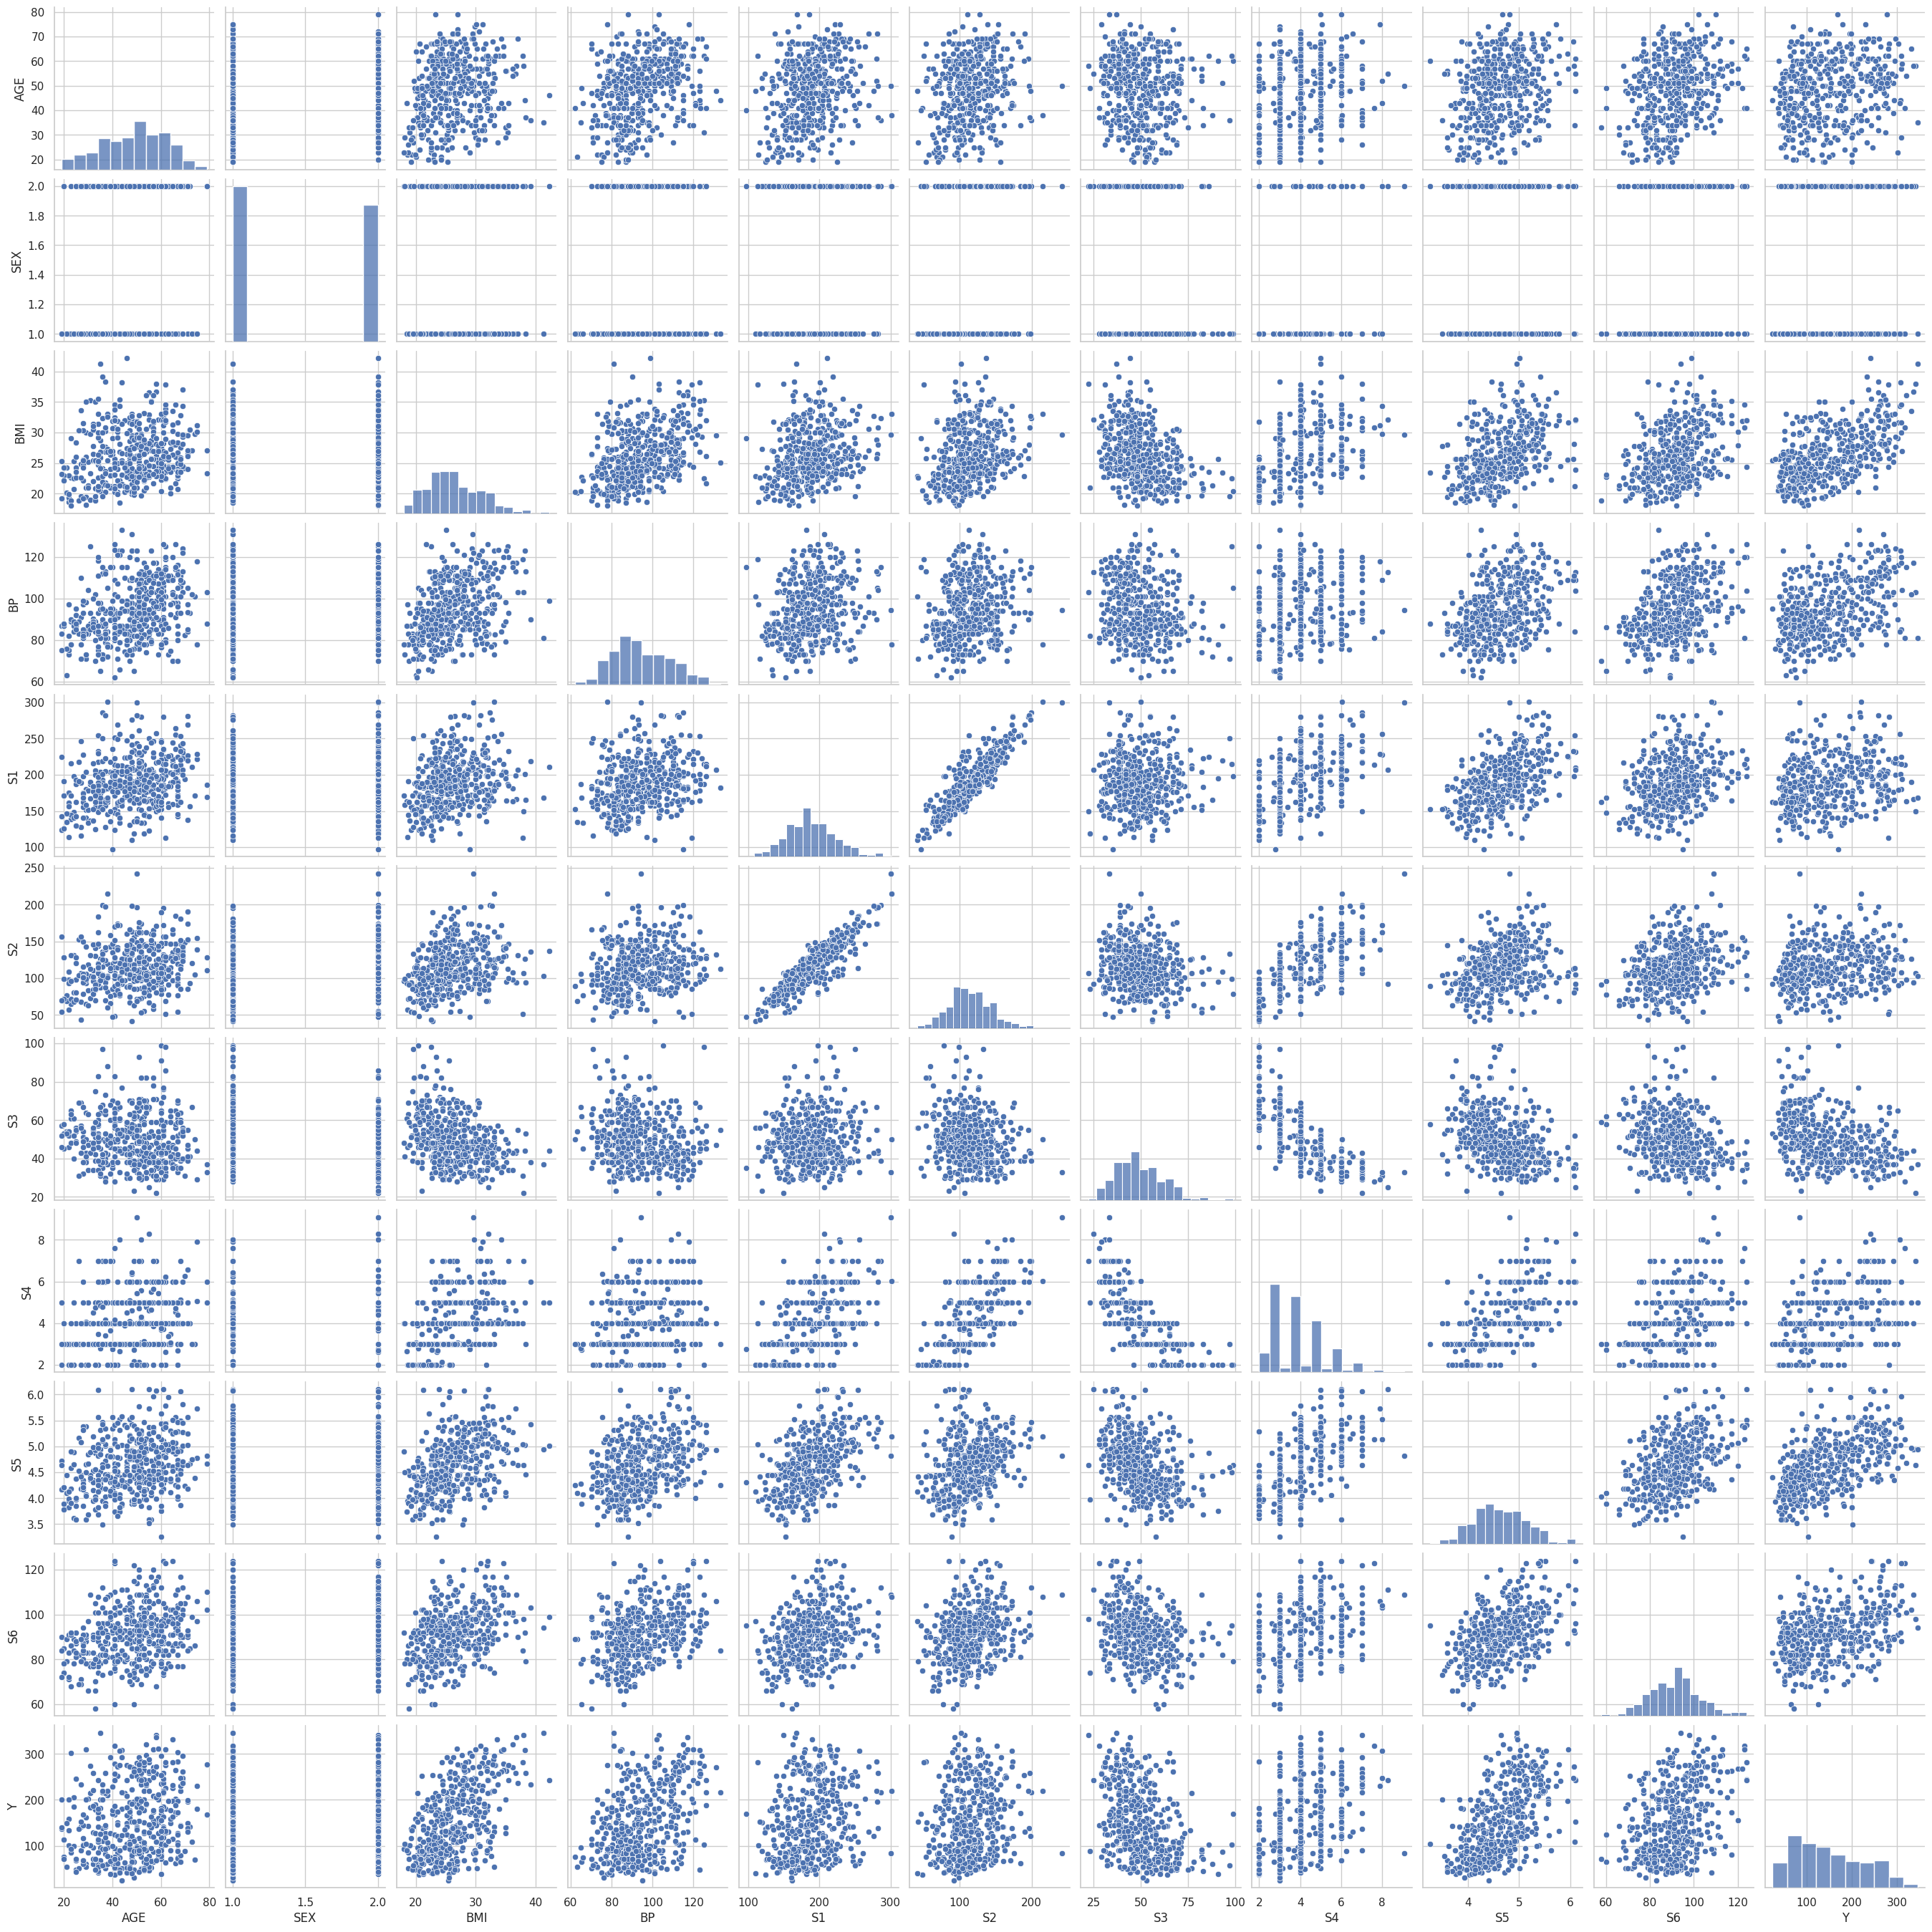

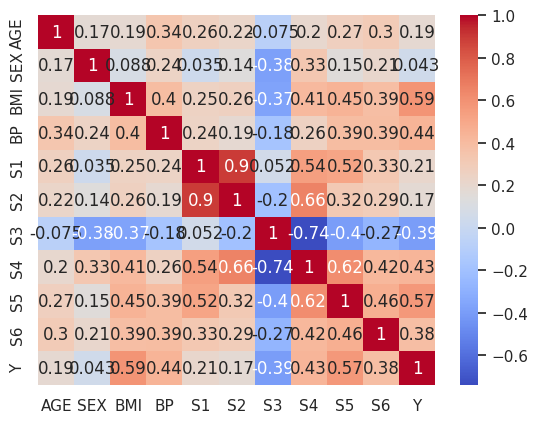

Correlation with Target Variable:
 Y      1.000000
BMI    0.586450
S5     0.565883
BP     0.441482
S4     0.430453
S6     0.382483
S1     0.212022
AGE    0.187889
S2     0.174054
SEX    0.043062
S3    -0.394789
Name: Y, dtype: float64


In [4]:
# Pairplot to visualize relationships between features
sns.pairplot(data)
plt.show()

# Correlation matrix to identify relationships between features
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.show()

# Identify the most influential features using correlation with the target variable
target_corr = corr_matrix['Y'].sort_values(ascending=False)
print("Correlation with Target Variable:\n", target_corr)


In [5]:
# Define the feature variables (X) and target variable (y)
X = data.drop(columns=['Y'])  # Dropping the target column 'Y'
y = data['Y']

# Split the data into training (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training data size: {X_train.shape}")
print(f"Test data size: {X_test.shape}")


Training data size: (353, 10)
Test data size: (89, 10)


In [6]:
# Choose a classifier - Linear Regression
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Evaluate the model using Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 2900.193628493482


In [8]:
from sklearn.model_selection import GridSearchCV

# Set up a parameter grid
param_grid = {'fit_intercept': [True, False], 'positive': [True, False]} # Removed 'normalize' and added 'positive' which is a valid parameter for LinearRegression

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=LinearRegression(), param_grid=param_grid, cv=5)

# Fit the grid search
grid_search.fit(X_train, y_train)

# Print the best parameters and the score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'fit_intercept': True, 'positive': False}
Best Score: 0.4492564741221221
